In [1]:
import numpy as np
import librosa
import librosa.display as display
import matplotlib.pyplot as plt
import sklearn
import IPython

In [3]:
sr = 22050

In [65]:
stuff = np.load('stuff_liz.npz')

WF0 = stuff['arr_0']
WGAMMA = stuff['arr_1']
psd = stuff['arr_7']

In [35]:
Ust = 5
F = psd.shape[0]
Fmin = librosa.note_to_hz('C2')
Fmax = librosa.note_to_hz('C7')
#Fmax = 20000

In [36]:
U = int(np.log2(Fmax/Fmin) * 12*Ust +1)

In [37]:
def uf(u,Fmin,Ust):
    return Fmin * np.power(2,(u)/(12*Ust))

In [38]:
u = np.arange(U)
uf0 = uf(u,Fmin,Ust)

In [15]:
freq=librosa.fft_frequencies(sr,0.1*sr)
freq.shape

(1103,)

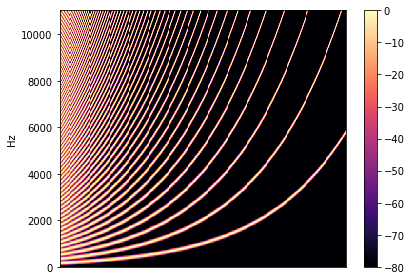

In [67]:
plt.figure(figsize=(6, 4))
librosa.display.specshow(librosa.amplitude_to_db(WF0[:400,:600], ref=np.max),
                           y_axis='linear', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

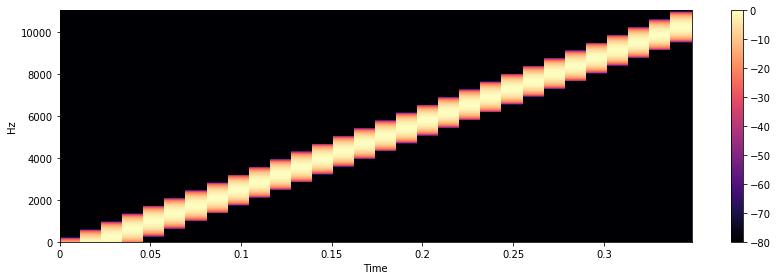

In [66]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(WGAMMA, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [68]:
stuff = np.load('out_liz.npz')

HGAMMA = stuff['arr_2']
HPHI = stuff['arr_3']
WM = stuff['arr_4']
HF0 = stuff['arr_5']
HM = stuff['arr_6']
SX = stuff['arr_7']

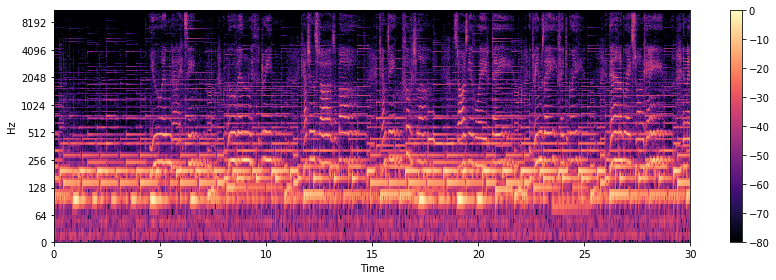

In [17]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(psd, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

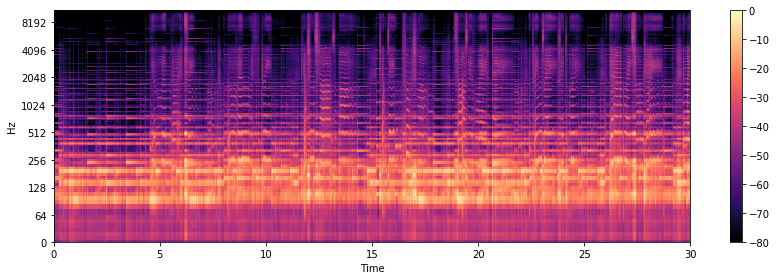

In [69]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(SX, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [78]:
SPHI = np.matmul(WGAMMA,np.matmul(HGAMMA,HPHI))

IS divergence: 11 itterations

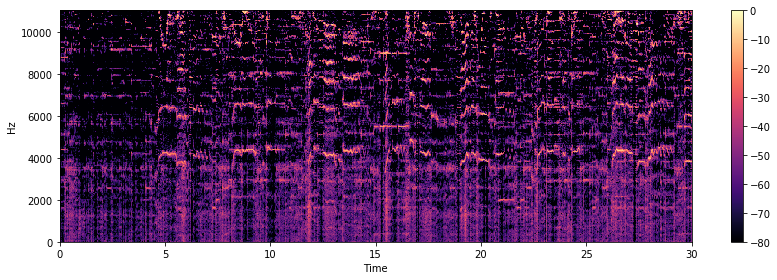

In [70]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

their code

In [21]:
import h5py

In [22]:
H0 = h5py.File('/mnt/Stuff/Acads/UGP/ismir2018_dominant_melody_estimation/SF-NMF/liz.h5','r')
HF0_a = H0['HF0']

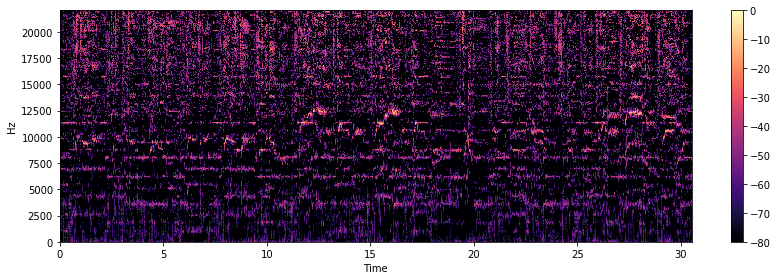

In [81]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0_a[:,1752:7011], ref=np.max),
                           y_axis='linear',x_axis='time', sr=2*sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [80]:
HF0_a.shape

(301, 24540)